In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
%run modules.ipynb

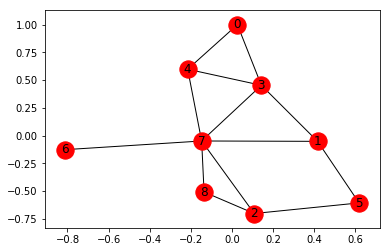

In [270]:
G = nx.fast_gnp_random_graph(9, 0.3)
graph = nx.to_numpy_array(G)
nx.draw_networkx(G)
adj = nx.to_numpy_array(G)
# consensus(adj, dd[:,:100,:], 3, method=1)

In [271]:
nx.spring_layout(G)

{0: array([0.2495772, 1.       ]),
 1: array([ 0.42354294, -0.12612263]),
 2: array([ 0.02033967, -0.65806488]),
 3: array([0.24971883, 0.41964025]),
 4: array([-0.07987697,  0.6354102 ]),
 5: array([ 0.56008535, -0.69561069]),
 6: array([-0.83546343,  0.0649331 ]),
 7: array([-0.16272951, -0.03356502]),
 8: array([-0.42519408, -0.60662033])}

In [272]:
adj.shape

(9, 9)

In [273]:
wind_time = pd.read_csv("RE-Europe_dataset_package/Nodal_TS/wind_signal_COSMO.csv")

In [306]:
consensus_matrix = consensus(adj, wind_time.iloc[:24*20, :10], 3, method=0, data_format="pandas", show=True)

0


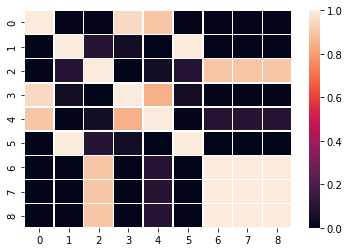

In [307]:
ax = sns.heatmap(consensus_matrix, linewidth=0.5)
plt.show()


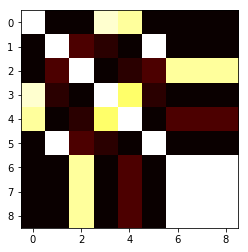

In [308]:
plt.imshow(consensus_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [309]:
hist, bins = np.histogram(consensus_matrix.ravel(), density=True)

In [310]:
clsrt = KMeans(n_clusters=3)

In [311]:
predictions = clsrt.fit_predict(consensus_matrix)

In [312]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import plotly.plotly as py
import colorlover as cl

init_notebook_mode(connected=True)

In [313]:
# G=nx.random_geometric_graph(10,0.125)
# pos = pos=nx.get_node_attributes(G,'pos')

In [314]:

pos = nx.spring_layout(G)

In [315]:
for key in pos.keys():
    G.node[key]['pos'] = pos[key]

In [316]:
# pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

In [317]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Hot',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [318]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([np.exp(predictions[node])])
    node_info = 'cluster: '+str(predictions[node]) + " node: " + str(node)
    node_trace['text']+=tuple([node_info]) 

In [319]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>RE dataset',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig, filename='networkx')

# Experiments with 9 bus

In [321]:
bus = pd.read_csv("9_buses/bus_9.csv")

In [325]:
bus

,bus_i,type,Pd,Qd,Gs,Bs,area,Vm,Va,baseKV,zone,Vmax,Vmin
0,1,3,0,0,0,0,1,1,0,345,1,1.1,0.9
1,2,2,0,0,0,0,1,1,0,345,1,1.1,0.9
2,3,2,0,0,0,0,1,1,0,345,1,1.1,0.9
3,4,1,0,0,0,0,1,1,0,345,1,1.1,0.9
4,5,1,90,30,0,0,1,1,0,345,1,1.1,0.9
5,6,1,0,0,0,0,1,1,0,345,1,1.1,0.9
6,7,1,100,35,0,0,1,1,0,345,1,1.1,0.9
7,8,1,0,0,0,0,1,1,0,345,1,1.1,0.9
8,9,1,125,50,0,0,1,1,0,345,1,1.1,0.9


In [323]:
branch = pd.read_csv("9_buses/branch_9.csv")

In [324]:
branch

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,4,0.0000,0.0576,0.000,250,250,250,0,0,1,-360,360
1,4,5,0.0170,0.0920,0.158,250,250,250,0,0,1,-360,360
2,5,6,0.0390,0.1700,0.358,150,150,150,0,0,1,-360,360
3,3,6,0.0000,0.0586,0.000,300,300,300,0,0,1,-360,360
4,6,7,0.0119,0.1008,0.209,150,150,150,0,0,1,-360,360
5,7,8,0.0085,0.0720,0.149,250,250,250,0,0,1,-360,360
6,8,2,0.0000,0.0625,0.000,250,250,250,0,0,1,-360,360
7,8,9,0.0320,0.1610,0.306,250,250,250,0,0,1,-360,360
8,9,4,0.0100,0.0850,0.176,250,250,250,0,0,1,-360,360


In [326]:
net = nx.Graph()

In [327]:
for node in bus.bus_i:
    net.add_node(node)
for i, row in branch.iterrows():
    net.add_edge(int(row.fbus), int(row.tbus)) 

In [333]:
wind_sample = wind_time.sample(9, axis=1)

In [335]:
wind_sample.head()

,857,989,3,848,773,1028,1159,1051,270
0,0.0960,0.1333,0.0280,0.1156,0.2107,0.1077,0.1003,0.1560,0.3811
1,0.1308,0.1890,0.0291,0.1221,0.2472,0.1032,0.1276,0.1804,0.3419
2,0.1756,0.2128,0.0336,0.1501,0.4610,0.1622,0.1153,0.2027,0.3523
3,0.2177,0.1556,0.0244,0.1742,0.7127,0.1431,0.1434,0.1824,0.3588
4,0.2442,0.1740,0.0202,0.1552,0.6530,0.0745,0.1845,0.2859,0.3300


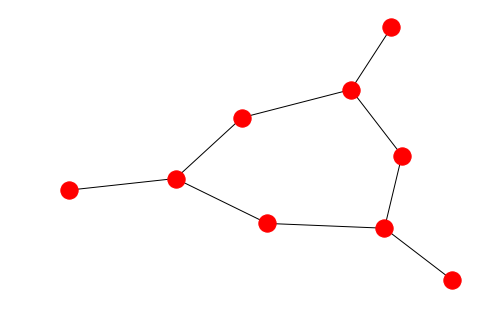

In [428]:
adj = nx.to_numpy_array(net)
nx.draw(net)

In [430]:
consensus_matrix = consensus(adj, wind_time.iloc[:24*20, :10], 3, method=0, data_format="pandas", show=True)

0


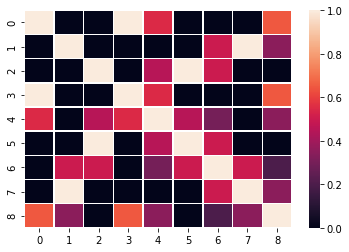

In [431]:
ax = sns.heatmap(consensus_matrix, linewidth=0.5)
plt.show()

In [432]:
clsrt = KMeans(n_clusters=3)
predictions = clsrt.fit_predict(1 -consensus_matrix)

In [438]:
predictions

array([1, 0, 2, 1, 1, 2, 2, 0, 1], dtype=int32)

In [446]:
pos = nx.spring_layout(net)
for key in pos.keys():
    net.node[key]['pos'] = pos[key]

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

In [503]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in net.edges():
    x0, y0 = net.node[edge[0]]['pos']
    x1, y1 = net.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Hot',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node cluster',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in net.nodes():
    x, y = net.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [504]:
for node, adjacencies in enumerate(net.adjacency()):
    node_trace['marker']['color']+=tuple([np.exp(predictions[node])])
    node_info = 'cluster: '+str(predictions[node] + 1) + " node: " + str(node+1)
    node_trace['text']+=tuple([node_info]) 

In [505]:
predictions[node]

1

In [506]:
predictions[node] + 1

2

In [508]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>9 Busses example',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig, filename='networkx')

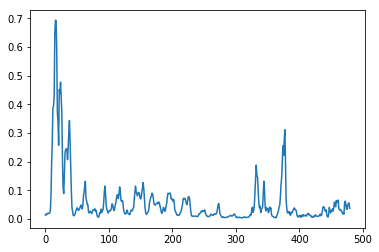

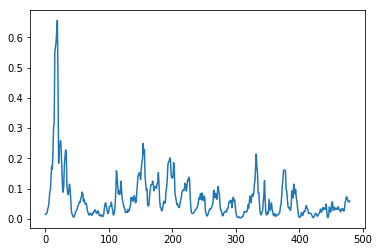

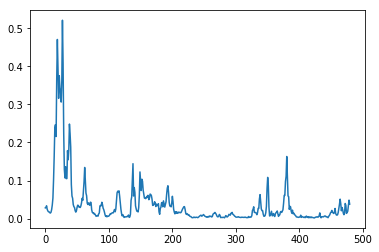

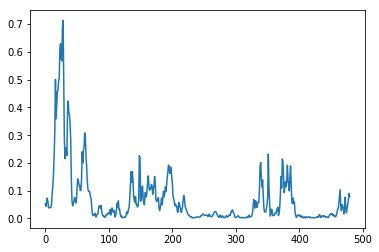

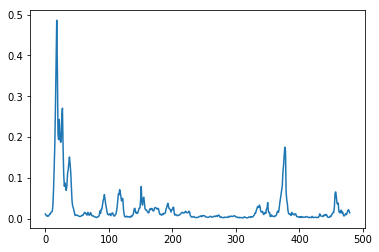

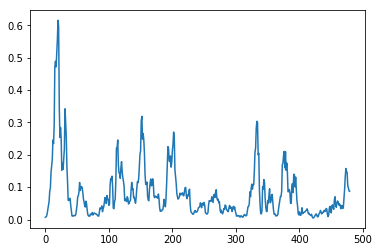

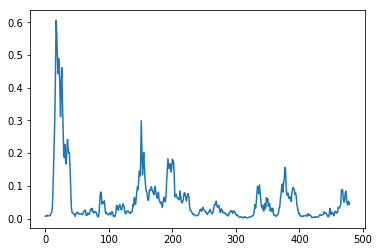

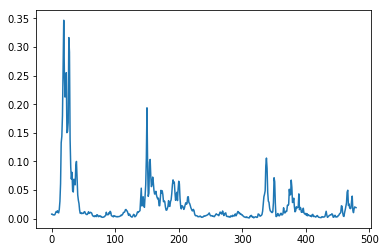

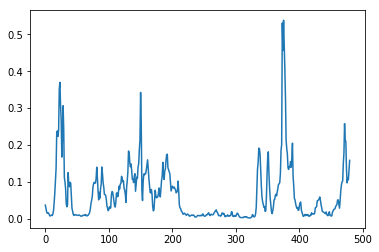

In [454]:
for i in range(1, 10):
    plt.plot(wind_time.iloc[:24*20, i])
    print(wind_time)
    plt.show()

In [466]:
means = [ wind_time.iloc[24*19:24*20, i].mean() for i in range(1, 10)]

In [465]:
wind_time.iloc[24*19:24*20, 10]

456    0.0151
457    0.0132
458    0.0126
459    0.0141
460    0.0164
461    0.0189
462    0.0129
463    0.0130
464    0.0143
465    0.0202
466    0.0348
467    0.0857
468    0.1103
469    0.1277
470    0.0980
471    0.1132
472    0.1377
473    0.2154
474    0.2014
475    0.1888
476    0.1730
477    0.1577
478    0.1558
479    0.1389
Name: 10, dtype: float64